In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from math import pi
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

from matplotlib import cm
import matplotlib.patheffects as path_effects

from PIL import Image, ImageDraw
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [164]:
pd.set_option('display.max_columns', None)

In [165]:
df_0102 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2001-2002/Arsenal-Stats')[0]
df_0203 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2002-2003/Arsenal-Stats')[0]
df_0304 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2003-2004/Arsenal-Stats')[0]
df_0405 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2004-2005/Arsenal-Stats')[0]
df_0506 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2005-2006/Arsenal-Stats')[0]
df_0607 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2006-2007/Arsenal-Stats')[0]
df_0708 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2007-2008/Arsenal-Stats')[0]
df_0809 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2008-2009/Arsenal-Stats')[0]
df_0910 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2009-2010/Arsenal-Stats')[0]
df_1011 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2010-2011/Arsenal-Stats')[0]
df_1112 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2011-2012/Arsenal-Stats')[0]
df_1213 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2012-2013/Arsenal-Stats')[0]
df_1314 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2013-2014/Arsenal-Stats')[0]
df_1415 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2014-2015/Arsenal-Stats')[0]
df_1516 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2015-2016/Arsenal-Stats')[0]
df_1617 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2016-2017/Arsenal-Stats')[0]
df_1718 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2017-2018/Arsenal-Stats')[0]
df_1819 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2018-2019/Arsenal-Stats')[0]
df_1920 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2019-2020/Arsenal-Stats')[0]
df_2021 = pd.read_html('https://fbref.com/en/squads/18bb7c10/2020-2021/Arsenal-Stats')[0]

In [166]:
def fbref_dropheader(df):
    my_df = df.copy()
    my_df = my_df.droplevel(0, axis=1)
    return(my_df)

In [167]:
df_0102 = fbref_dropheader(df_0102)
df_0203 = fbref_dropheader(df_0203)
df_0304 = fbref_dropheader(df_0304)
df_0405 = fbref_dropheader(df_0405)
df_0506 = fbref_dropheader(df_0506)
df_0607 = fbref_dropheader(df_0607)
df_0708 = fbref_dropheader(df_0708)
df_0809 = fbref_dropheader(df_0809)
df_0910 = fbref_dropheader(df_0910)
df_1011 = fbref_dropheader(df_1011)
df_1112 = fbref_dropheader(df_1112)
df_1213 = fbref_dropheader(df_1213)
df_1314 = fbref_dropheader(df_1314)
df_1415 = fbref_dropheader(df_1415)
df_1516 = fbref_dropheader(df_1516)
df_1617 = fbref_dropheader(df_1617)
df_1718 = fbref_dropheader(df_1718)
df_1819 = fbref_dropheader(df_1819)
df_1920 = fbref_dropheader(df_1920)
df_2021 = fbref_dropheader(df_2021)

In [168]:
df_2021['Age'] = df_2021['Age'].str[:2]

In [169]:
df_0102.loc[:,'Season'] = '2001/2002'
df_0203.loc[:,'Season'] = '2002/2003'
df_0304.loc[:,'Season'] = '2003/2004'
df_0405.loc[:,'Season'] = '2004/2005'
df_0506.loc[:,'Season'] = '2005/2006'
df_0607.loc[:,'Season'] = '2006/2007'
df_0708.loc[:,'Season'] = '2007/2008'
df_0809.loc[:,'Season'] = '2008/2009'
df_0910.loc[:,'Season'] = '2009/2010'
df_1011.loc[:,'Season'] = '2010/2011'
df_1112.loc[:,'Season'] = '2011/2012'
df_1213.loc[:,'Season'] = '2012/2013'
df_1314.loc[:,'Season'] = '2013/2014'
df_1415.loc[:,'Season'] = '2014/2015'
df_1516.loc[:,'Season'] = '2015/2016'
df_1617.loc[:,'Season'] = '2016/2017'
df_1718.loc[:,'Season'] = '2017/2018'
df_1819.loc[:,'Season'] = '2018/2019'
df_1920.loc[:,'Season'] = '2019/2020'
df_2021.loc[:,'Season'] = '2020/2021'

In [174]:
df_0304

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G-PK,G+A-PK,Matches,Season,nineties
0,Jens Lehmann,de GER,GK,33.0,38,38,3420.0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,Matches,2003/2004,38.000000
1,Thierry Henry,fr FRA,FW,25.0,37,37,3330.0,30,9,7,7,3,0,0.81,0.24,1.05,0.62,0.86,Matches,2003/2004,37.000000
2,Kolo Touré,ci CIV,DF,22.0,37,36,3184.0,1,1,0,0,4,0,0.03,0.03,0.06,0.03,0.06,Matches,2003/2004,35.377778
3,Sol Campbell,eng ENG,"DF,FW",28.0,35,35,3085.0,1,0,0,0,2,1,0.03,0.00,0.03,0.03,0.03,Matches,2003/2004,34.277778
4,Robert Pirès,fr FRA,"FW,MF",29.0,36,33,2845.0,14,10,0,0,0,0,0.44,0.32,0.76,0.44,0.76,Matches,2003/2004,31.611111
5,Ashley Cole,eng ENG,DF,22.0,32,32,2825.0,0,3,0,0,5,1,0.00,0.10,0.10,0.00,0.10,Matches,2003/2004,31.388889
6,Lauren,cm CMR,DF,26.0,32,30,2744.0,0,0,0,0,6,0,0.00,0.00,0.00,0.00,0.00,Matches,2003/2004,30.488889
7,Gilberto Silva,br BRA,"DF,MF",26.0,32,29,2546.0,4,3,0,0,2,0,0.14,0.11,0.25,0.14,0.25,Matches,2003/2004,28.288889
8,Patrick Vieira,fr FRA,MF,27.0,29,29,2536.0,3,5,0,0,10,1,0.11,0.18,0.28,0.11,0.28,Matches,2003/2004,28.177778
9,Freddie Ljungberg,se SWE,"FW,MF",26.0,30,28,2232.0,4,7,0,0,2,0,0.16,0.28,0.44,0.16,0.44,Matches,2003/2004,24.800000


In [171]:
def fbref_nineites(df):
    df['nineties'] = df['Min'] / 90
    mask = df['nineties'] > 11.11
    df=df.loc[mask]
    return(df)

In [172]:
df_0102 = fbref_nineites(df_0102)
df_0203 = fbref_nineites(df_0203)
df_0304 = fbref_nineites(df_0304)
df_0405 = fbref_nineites(df_0405)
df_0506 = fbref_nineites(df_0506)
df_0607 = fbref_nineites(df_0607)
df_0708 = fbref_nineites(df_0708)
df_0809 = fbref_nineites(df_0809)
df_0910 = fbref_nineites(df_0910)
df_1011 = fbref_nineites(df_1011)
df_1112 = fbref_nineites(df_1112)
df_1213 = fbref_nineites(df_1213)
df_1314 = fbref_nineites(df_1314)
df_1415 = fbref_nineites(df_1415)
df_1516 = fbref_nineites(df_1516)
df_1617 = fbref_nineites(df_1617)
df_1718 = fbref_nineites(df_1718)
df_1819 = fbref_nineites(df_1819)
df_1920 = fbref_nineites(df_1920)

In [173]:
df_0102.to_csv('fbref_arse_0102.csv', index=False)
df_0203.to_csv('fbref_arse_0203.csv', index=False)
df_0304.to_csv('fbref_arse_0304.csv', index=False)
df_0405.to_csv('fbref_arse_0405.csv', index=False)
df_0506.to_csv('fbref_arse_0506.csv', index=False)
df_0607.to_csv('fbref_arse_0607.csv', index=False)
df_0708.to_csv('fbref_arse_0708.csv', index=False)
df_0809.to_csv('fbref_arse_0809.csv', index=False)
df_0910.to_csv('fbref_arse_0910.csv', index=False)
df_1011.to_csv('fbref_arse_1011.csv', index=False)
df_1112.to_csv('fbref_arse_1112.csv', index=False)
df_1213.to_csv('fbref_arse_1213.csv', index=False)
df_1314.to_csv('fbref_arse_1314.csv', index=False)
df_1415.to_csv('fbref_arse_1415.csv', index=False)
df_1516.to_csv('fbref_arse_1516.csv', index=False)
df_1617.to_csv('fbref_arse_1617.csv', index=False)
df_1718.to_csv('fbref_arse_1718.csv', index=False)
df_1819.to_csv('fbref_arse_1819.csv', index=False)
df_1920.to_csv('fbref_arse_1920.csv', index=False)
df_2021.to_csv('fbref_arse_2021.csv', index=False)

In [11]:
import os
import glob

In [12]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "arsenal_all.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv('./arsenal_all.csv')

In [5]:
df = df[['Player', 'Age', 'Season']]

In [6]:
df.Season.value_counts()

2020/2021    23
2019/2020    18
2014/2015    18
2018/2019    17
2005/2006    17
2008/2009    17
2009/2010    17
2017/2018    16
2006/2007    16
2002/2003    16
2001/2002    16
2012/2013    16
2016/2017    16
2004/2005    15
2011/2012    15
2013/2014    15
2010/2011    15
2007/2008    15
2015/2016    15
2003/2004    13
Name: Season, dtype: int64

In [7]:
def fbref_cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Player','Season'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player','Season']], num_df], axis = 1)
    return master_df

In [8]:
df = fbref_cleaner(df)

In [9]:
df1 = df.groupby('Season').Age.mean().sort_values()
df1

Season
2014/2015    23.388889
2008/2009    23.705882
2019/2020    24.000000
2010/2011    24.066667
2012/2013    24.250000
2016/2017    24.312500
2007/2008    24.400000
2009/2010    24.647059
2006/2007    24.750000
2020/2021    24.782609
2011/2012    24.866667
2018/2019    24.882353
2017/2018    25.000000
2015/2016    25.333333
2005/2006    25.588235
2004/2005    26.333333
2013/2014    26.600000
2003/2004    27.153846
2001/2002    27.437500
2002/2003    28.125000
Name: Age, dtype: float64

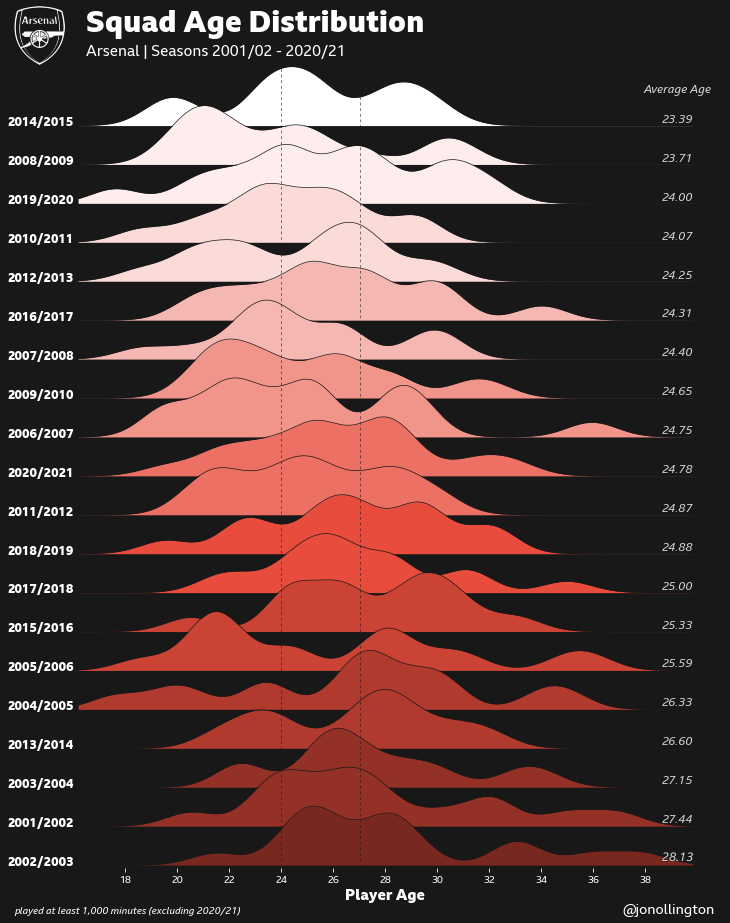

In [179]:
teams = ['2014/2015',
        '2008/2009',
        '2019/2020',
        '2010/2011',
        '2012/2013',
        '2016/2017',
        '2007/2008',
        '2009/2010',
        '2006/2007',
        '2020/2021',
        '2011/2012',
        '2018/2019',
        '2017/2018',
        '2015/2016',
        '2005/2006',
        '2004/2005',
        '2013/2014',
        '2003/2004',
        '2001/2002',
        '2002/2003']

csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}


colors = ['white', '#FDEDEC', '#FDEDEC', '#FADBD8', '#FADBD8', '#F5B7B1', '#F5B7B1', '#F1948A', '#F1948A','#EC7063',
          '#EC7063', '#E74C3C', '#E74C3C', '#CB4335', '#CB4335', '#B03A2E', '#B03A2E', '#943126', '#943126', '#78281F']


gs = grid_spec.GridSpec(len(teams),1)
fig = plt.figure(figsize=(10,12))

bg = "#181818"
ax = fig.add_subplot(111)
plt.box(False)             #add this line
plt.tick_params(color="#181818")  #add this line
ax.minorticks_off()

xt = [18,20,22,24,26,28,30,32,34,36,38]
xlabels = [18,20,22,24,26,28,30,32,34,36,38]
ax.set_xticks(xt)
ax.set_xticklabels(xlabels,color="white", **csfont)
ax.set_xlim(15,41)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors=bg)
fig.set_facecolor(bg)


i = 0

ax_objs = []
for team in teams:
    team = teams[i]
    x = np.array(df[df.Season == team].Age)
    x_d = np.linspace(15.5,40, 1000)

    kde = KernelDensity(bandwidth=1, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, :]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#181818",lw=0.7)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i],lw=0.05)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_ylabel('')
    ax_objs[-1].set_xticklabels([])
    ax_objs[-1].set_xlabel('')
    ax_objs[-1].minorticks_off()
    ax_objs[-1].set_xticks([]) 
    ax_objs[-1].set_yticks([]) 

    if i == len(teams)-1:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = team.replace(" "," ")
    ax_objs[-1].text(14,0,adj_country,fontweight="bold",fontsize=12,ha="center",color="white",**csfont)


    i += 1

gs.update(hspace=-0.4)

ax.set_xlabel("Player Age",fontsize=14,fontweight="bold",color="white",**csfont,size=15)

fig.text(0.875,0.95,"Average Age",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.915,"23.39",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.87,"23.71",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.825,"24.00",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.78,"24.07",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.735,"24.25",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.69,"24.31",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.645,"24.40",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.6,"24.65",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.555,"24.75",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.51,"24.78",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.465,"24.87",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.42,"24.88",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.375,"25.00",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.33,"25.33",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.285,"25.59",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.24,"26.33",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.195,"26.60",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.15,"27.15",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
fig.text(0.9,0.105,"27.44",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')
n = fig.text(0.9,0.06 ,"28.13",fontsize=12, color="lightgrey",**csfont,fontstyle='italic')

n.set_path_effects([path_effects.withStroke(linewidth=1,foreground=bg)])

ax1 = fig.add_axes([0.366,0.01,0.01,1.02])
ax1.axis("off")
ax1.plot([1,1],[1,0],color=bg,zorder=5, alpha=0.8, ls="--",lw=0.7,dashes=(4, 4))

ax2 = fig.add_axes([0.4755,0.01,0.01,1.02])
ax2.axis("off")
ax2.plot([1,1],[1,0],color=bg,zorder=5, alpha=0.8, ls="--",lw=0.7,dashes=(4, 4))

ax3 = fig.add_axes([0,0.98,0.07,0.07]) # badge
ax3.axis("off")
img = Image.open('./Arsenal.png')
ax3.imshow(img)

fig.text(0.1,1.02,"Squad Age Distribution",fontsize=30, color="white",**csfont, fontweight='bold')
fig.text(0.1,0.993,"Arsenal | Seasons 2001/02 - 2020/21",fontsize=15, color="white", **csfont)
fig.text(0.845,0, "@jonollington",fontsize=14, color="white",**csfont)
fig.text(0,0,"played at least 1,000 minutes (excluding 2020/21)",color="white",fontsize=10, **csfont, fontstyle='italic')
plt.tight_layout()
plt.savefig("Arsenal Age Distribution",dpi=500,facecolor=bg,bbox_inches="tight")
plt.show()

In [180]:
pwd

'/Users/ollinj01/Football Analytics/TASK-birkbeck-lecture-2'